Missing values in each column:
 id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

Descriptive statistics:
                 id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         

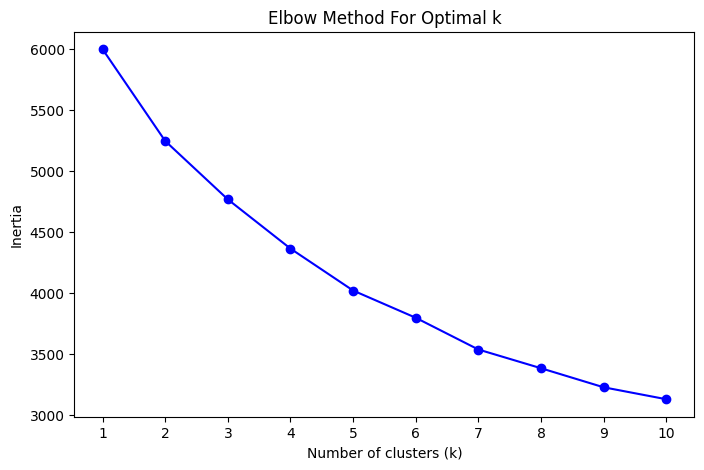

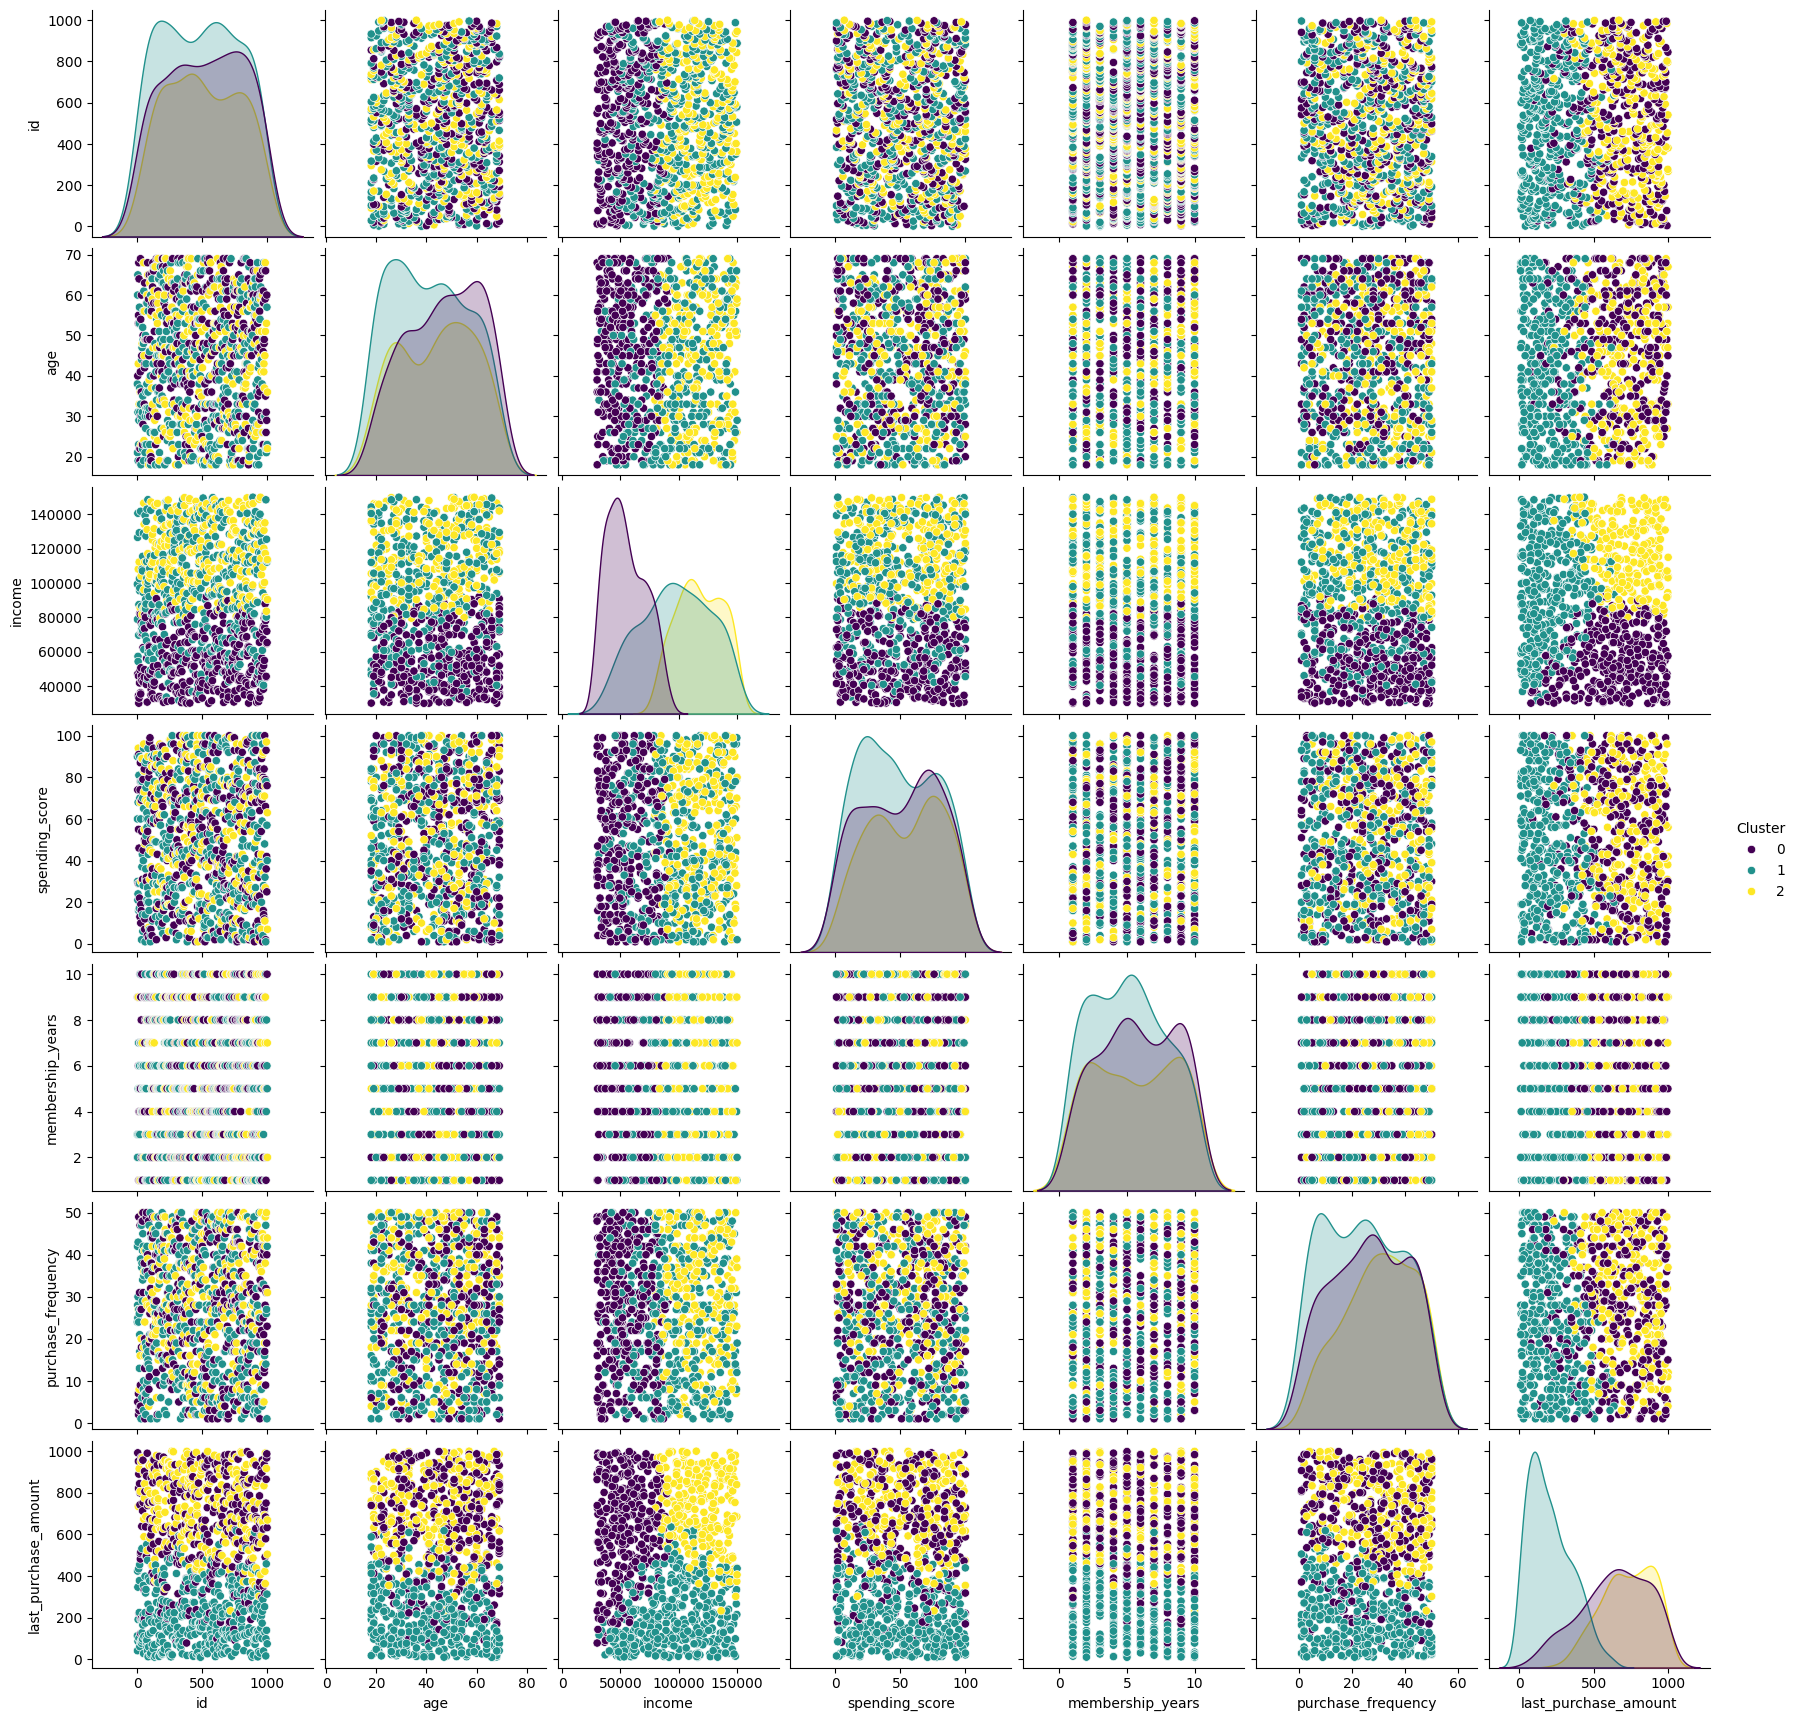

                 id        age         income  spending_score  \
Cluster                                                         
0        516.690691  46.801802   54764.969970       50.756757   
1        482.384810  41.088608   96977.481013       48.111392   
2        506.985294  44.000000  117492.500000       54.334559   

         membership_years  purchase_frequency  last_purchase_amount  Cluster  
Cluster                                                                       
0                5.774775           26.477477            637.475225      0.0  
1                5.134177           24.243038            208.395772      1.0  
2                5.580882           30.158088            727.033419      2.0  


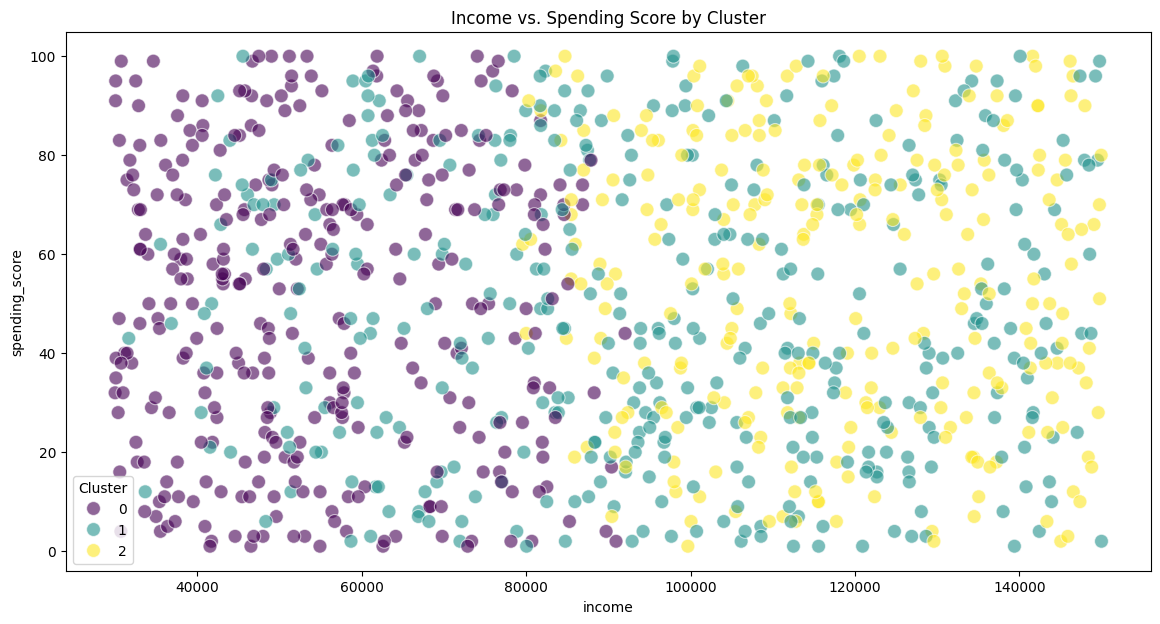

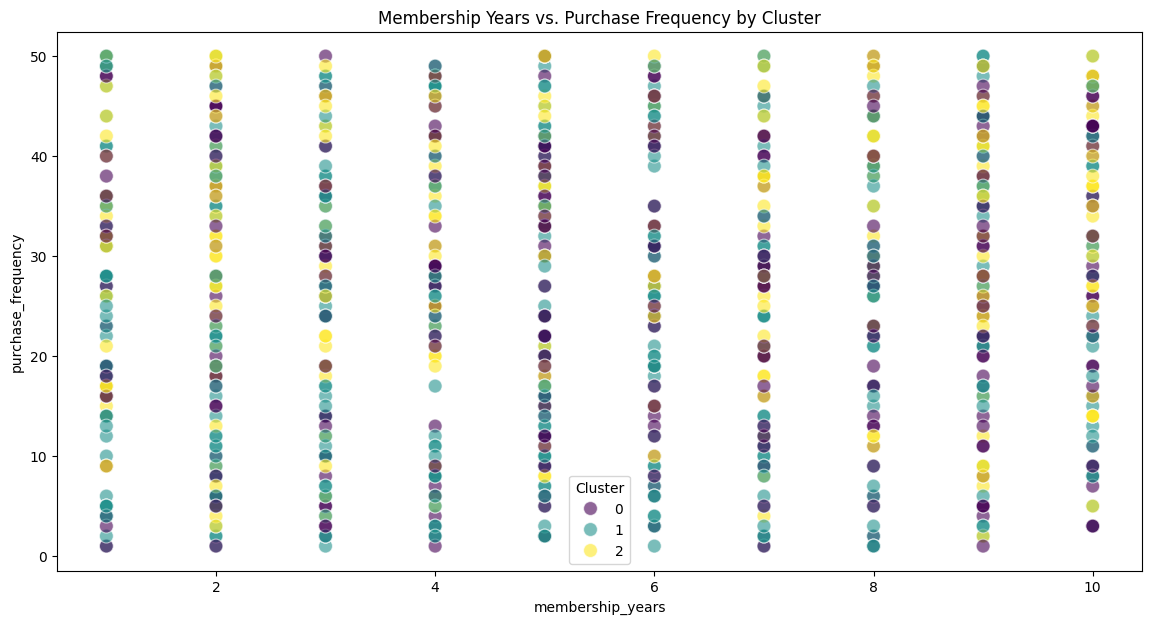

### Cluster 0:
- **Characteristics**:
  - Average age: 46.80
  - Average income: 54764.97
  - Spending score: 50.76
  - Membership years: 5.77
  - Purchase frequency: 26.48
  - Last purchase amount: 637.48

- **Recommendations**:
  - Marketing Strategy: Focus on promotions that highlight value for money and practical benefits.
  - Loyalty Programs: Enhance loyalty programs with rewards that can be redeemed on practical items or essential services.
  - Product Recommendations: Promote mid-range products with strong value propositions and reliability features.


### Cluster 1:
- **Characteristics**:
  - Average age: 41.09
  - Average income: 96977.48
  - Spending score: 48.11
  - Membership years: 5.13
  - Purchase frequency: 24.24
  - Last purchase amount: 208.40

- **Recommendations**:
  - Marketing Strategy: Target this segment with promotions for high-end, quality products.
  - Loyalty Programs: Introduce premium membership tiers that offer exclusive perks.
  - Product Recommendation

In [6]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
data_path = '../data/customer_segmentation_data.csv' 
data = pd.read_csv(data_path)

# Step 3: Data Exploration
print("Missing values in each column:\n", data.isnull().sum())
print("\nDescriptive statistics:\n", data.describe())

# Step 4: Feature Selection
features = data[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']]

# Step 5: Standardize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Determine Optimal Number of Clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Step 7: Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()

# Based on the elbow plot, let's choose the optimal number of clusters, for example, k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 8: Visualize Clusters
sns.pairplot(data, hue='Cluster', palette='viridis')
plt.show()

# Step 9: Detailed Cluster Analysis
# Select only numeric columns for the groupby operation
numeric_columns = data.select_dtypes(include='number').columns
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

# Additional Visualizations for Clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(x='income', y='spending_score', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.6)
plt.title('Income vs. Spending Score by Cluster')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='membership_years', y='purchase_frequency', hue='Cluster', data=data, palette='viridis', s=100, alpha=0.6)
plt.title('Membership Years vs. Purchase Frequency by Cluster')
plt.show()

# Step 10: Print Recommendations
def print_cluster_recommendations(cluster_summary):
    clusters = cluster_summary.index

    recommendations = {
        0: {
            "Characteristics": {
                "Average age": cluster_summary.loc[0, 'age'],
                "Average income": cluster_summary.loc[0, 'income'],
                "Spending score": cluster_summary.loc[0, 'spending_score'],
                "Membership years": cluster_summary.loc[0, 'membership_years'],
                "Purchase frequency": cluster_summary.loc[0, 'purchase_frequency'],
                "Last purchase amount": cluster_summary.loc[0, 'last_purchase_amount']
            },
            "Recommendations": {
                "Marketing Strategy": "Focus on promotions that highlight value for money and practical benefits.",
                "Loyalty Programs": "Enhance loyalty programs with rewards that can be redeemed on practical items or essential services.",
                "Product Recommendations": "Promote mid-range products with strong value propositions and reliability features."
            }
        },
        1: {
            "Characteristics": {
                "Average age": cluster_summary.loc[1, 'age'],
                "Average income": cluster_summary.loc[1, 'income'],
                "Spending score": cluster_summary.loc[1, 'spending_score'],
                "Membership years": cluster_summary.loc[1, 'membership_years'],
                "Purchase frequency": cluster_summary.loc[1, 'purchase_frequency'],
                "Last purchase amount": cluster_summary.loc[1, 'last_purchase_amount']
            },
            "Recommendations": {
                "Marketing Strategy": "Target this segment with promotions for high-end, quality products.",
                "Loyalty Programs": "Introduce premium membership tiers that offer exclusive perks.",
                "Product Recommendations": "Focus on premium and luxury items that resonate with their higher disposable income."
            }
        },
        2: {
            "Characteristics": {
                "Average age": cluster_summary.loc[2, 'age'],
                "Average income": cluster_summary.loc[2, 'income'],
                "Spending score": cluster_summary.loc[2, 'spending_score'],
                "Membership years": cluster_summary.loc[2, 'membership_years'],
                "Purchase frequency": cluster_summary.loc[2, 'purchase_frequency'],
                "Last purchase amount": cluster_summary.loc[2, 'last_purchase_amount']
            },
            "Recommendations": {
                "Marketing Strategy": "Utilize personalized marketing strategies highlighting exclusive and high-value products.",
                "Loyalty Programs": "Design loyalty programs with high-value rewards and exclusive experiences.",
                "Product Recommendations": "Recommend high-end, luxury products and exclusive collections."
            }
        }
    }

    for cluster in clusters:
        print(f"### Cluster {cluster}:")
        print("- **Characteristics**:")
        for key, value in recommendations[cluster]["Characteristics"].items():
            print(f"  - {key}: {value:.2f}")
        print("\n- **Recommendations**:")
        for key, value in recommendations[cluster]["Recommendations"].items():
            print(f"  - {key}: {value}")
        print("\n")

# Call the function with the cluster summary data
print_cluster_recommendations(cluster_summary)
